In [3]:
#import basic libraries required to load data
import numpy as np
import pandas as pd

In [4]:
#load data through pandas
Grad_Admissions = pd.read_csv(r"C:\Users\Vyom\Documents\Machine Learning\Admission_Predict.csv")

In [5]:
Grad_Admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
Grad_Admissions = Grad_Admissions.drop(['Serial No.'],axis=1)
Grad_Admissions.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
#Find out any missing values
Grad_Admissions.isna().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [8]:
#To determine outliers through Z-Score
import numpy as np
from scipy import stats

z = np.abs(stats.zscore(Grad_Admissions))
#print(z)

threshold = 3
print(np.where(z > 3))

print(z[58][5])
#As only one outlier is found, it will not impact the prediction

(array([58], dtype=int64), array([5], dtype=int64))
3.0205035070536796


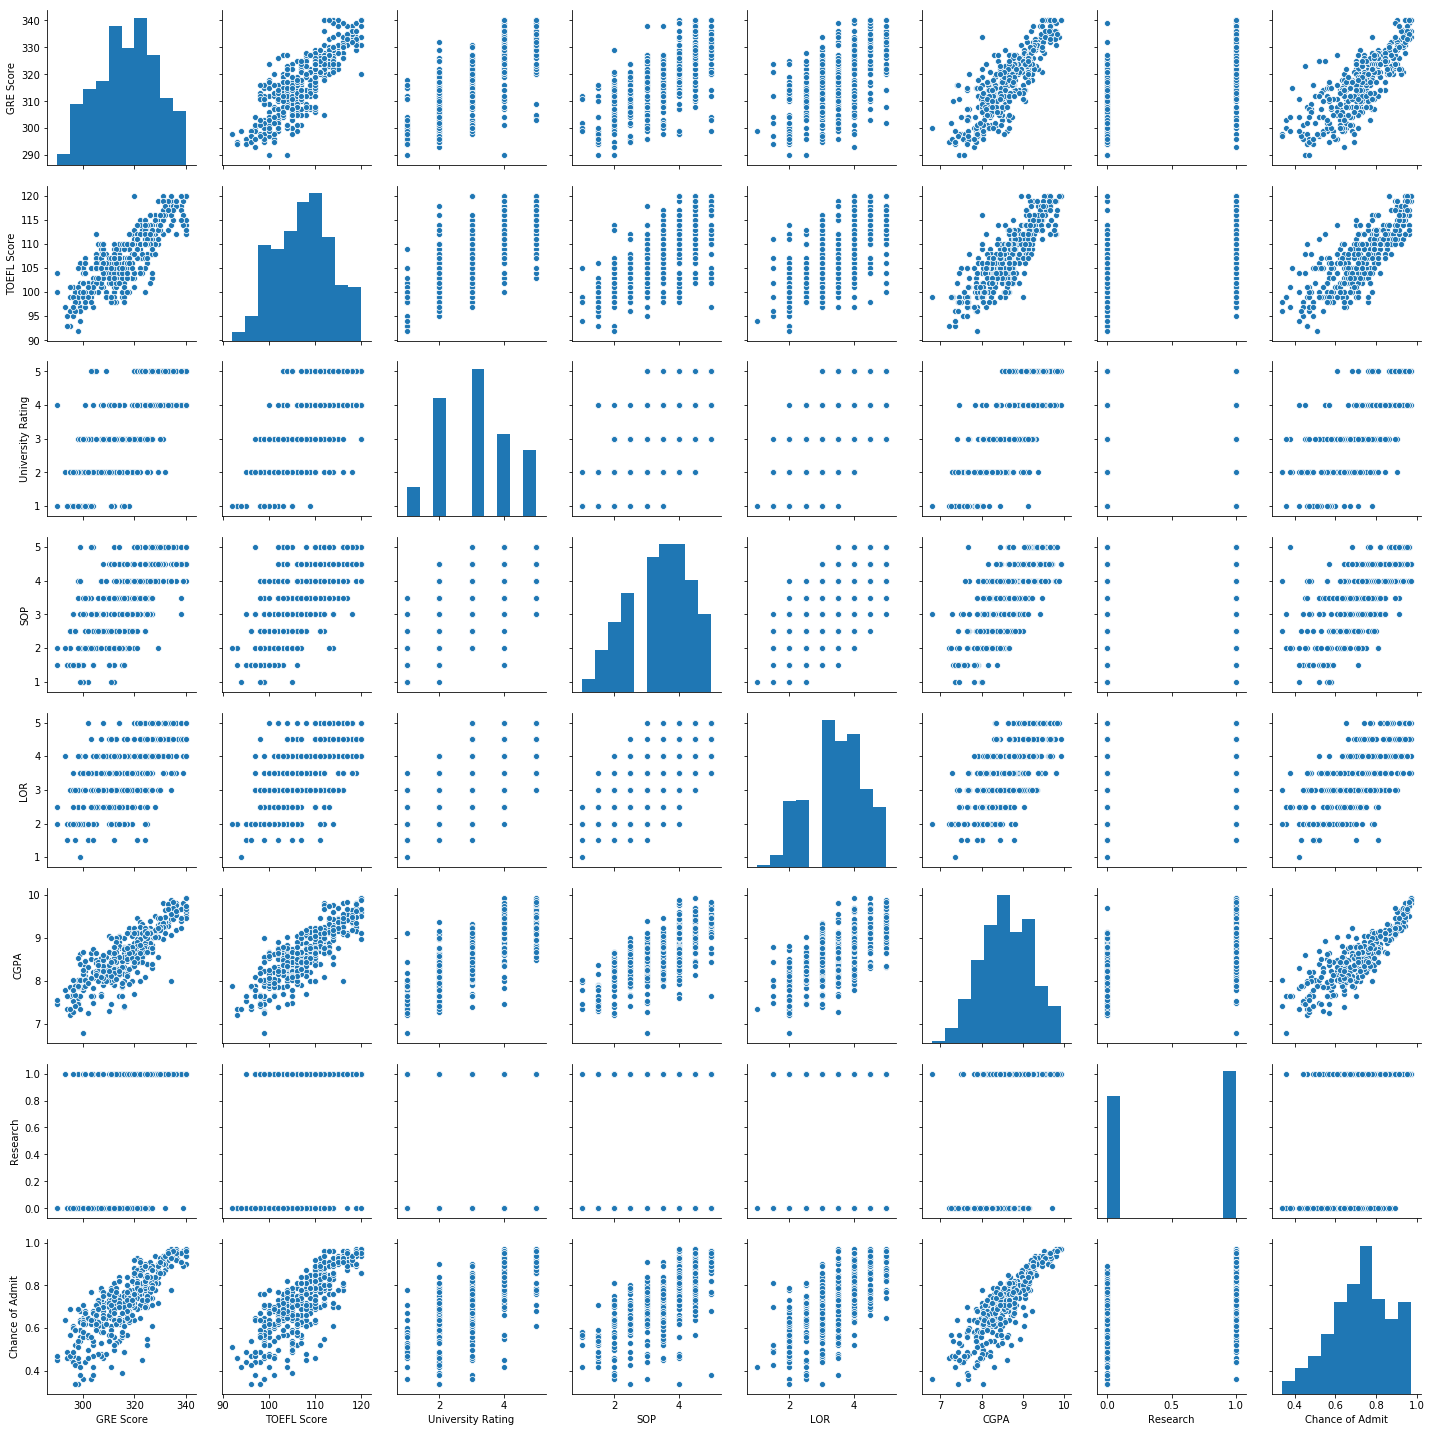

In [10]:
#Data Analysis of all the features using pair-plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(Grad_Admissions)

In [11]:
X = Grad_Admissions.drop(['Chance of Admit'], axis=1)
y = Grad_Admissions['Chance of Admit']

In [12]:
#Standardize data for prediction using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand_X = scaler.fit_transform(X)
print(stand_X)

[[ 1.76210664  1.74697064  0.79882862 ...  1.16732114  1.76481828
   0.90911166]
 [ 0.62765641 -0.06763531  0.79882862 ...  1.16732114  0.45515126
   0.90911166]
 [-0.07046681 -0.56252785 -0.07660001 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.15124883  1.41704229  0.79882862 ...  1.16732114  1.42900622
   0.90911166]
 [-0.41952842 -0.72749202 -0.07660001 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.41304503  1.58200646  0.79882862 ...  0.61012728  1.78160888
   0.90911166]]


c:\users\vyom\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\vyom\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [13]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(stand_X, y, test_size=0.2, random_state=42)

print("train data ", train_X.shape, train_y.shape)
print("test data ", test_X.shape, test_y.shape)

train data  (320, 7) (320,)
test data  (80, 7) (80,)


In [18]:
#Fit data to Linear Regression model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print ('Coefficients: ', mlr.coef_)
print ('Intercept: ', mlr.intercept_)

Coefficients:  [ 0.02134305  0.01651078  0.00842724 -0.00029438  0.01415149  0.06829365
  0.01106326]
Intercept:  0.7268046373139083


In [20]:
#Predict data on test dataset
y_pred = mlr.predict(test_X)

In [21]:
#Calculate Mean Squared Error for Linear Regression Model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
print("MSE: %f" % mse)
print("RMSE: %f" % rmse)

MSE: 0.004617
RMSE: 0.067949


In [22]:
#Calculate R2 Score for Linear Regression Model
from sklearn.metrics import r2_score

print("R2-score: %f" % r2_score(test_y , y_pred))

R2-score: 0.821208


In [23]:
#KNN Regression Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

cv_scores = []

#perform 10-fold cross-validation for values of k from 1 to 50
for k in range(1,51):
    neigh = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(neigh, train_X, train_y.ravel(), cv=10)
    cv_scores.append(scores.mean())

#Misclassification Error
MSE = [1- x for x in cv_scores]

#Optimal Value of K for KNN
best_k = MSE.index(min(MSE)) + 1
print(best_k)

22


In [24]:
#Fit data to KNN Regression Model and predict on test dataset
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(train_X, train_y) 
y_knn_pred = knn.predict(test_X)

In [25]:
#Calculate Mean Squared Error for KNN Regression Model
mse = mean_squared_error(test_y, y_knn_pred)
rmse = np.sqrt(mse)
print("MSE: %f" % mse)
print("RMSE: %f" % rmse)

MSE: 0.006063
RMSE: 0.077866


In [26]:
#R2 Score for KNN Regression Model
print("R2-score: %f" % r2_score(test_y , y_knn_pred))

R2-score: 0.765207
